In [5]:
!pip install mysql-connector-python

In [17]:
import mysql.connector
import pandas as pd
# Connect to MySQL
connection = mysql.connector.connect(
    host="localhost",       # Replace with your host (e.g., "127.0.0.1")
    user="root",   # Your MySQL username
    password="1234", # Your MySQL password
    database="project" # Optional: specify database to connect to
)

# Check connection
if connection.is_connected():
    print("Connected to MySQL!")

Connected to MySQL!


In [18]:
#create cursor object to execute sql queries
cursor = connection.cursor()
# Query the data from walmart data sale
cursor.execute("SELECT * FROM dataset")
#After fetching data from the database we are storing it into Pandas DataFrame
dataset = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(dataset.head(5))

  PlayerID       Region          Platform       Genre AgeGroup  \
0       P1  South Korea            Tablet  Simulation    13-18   
1       P2  South Korea  Epic Games Store     Cooking    26-35   
2       P3       Canada             Steam      Puzzle    26-35   
3       P4    Australia  Epic Games Store      Horror      46+   
4       P5       Russia            Tablet        Idle    19-25   

   MonthlyRevenue  PlaytimeHours   StreamPlatform  StreamViewership  \
0           67.19           23.2            DLive                15   
1          146.45           99.5          Nimo TV                 3   
2           13.42           98.4           Twitch               185   
3          122.50           62.4  Facebook Gaming               719   
4          100.98           35.2          Nimo TV                99   

   GamePopularityScore  SubscriptionType  Year  
0                   13              Free  2021  
1                   88              Free  2021  
2                   33       

In [16]:
dataset.shape

(1000, 12)

In [19]:
dataset.describe

<bound method NDFrame.describe of     PlayerID       Region          Platform       Genre AgeGroup  \
0         P1  South Korea            Tablet  Simulation    13-18   
1         P2  South Korea  Epic Games Store     Cooking    26-35   
2         P3       Canada             Steam      Puzzle    26-35   
3         P4    Australia  Epic Games Store      Horror      46+   
4         P5       Russia            Tablet        Idle    19-25   
..       ...          ...               ...         ...      ...   
995     P996        Egypt            Tablet         RPG    26-35   
996     P997          USA            Mobile      Sports    13-18   
997     P998      Germany       PlayStation    Strategy    13-18   
998     P999    Australia   Nintendo Switch       Music    26-35   
999    P1000           UK            Mobile    Fighting    19-25   

     MonthlyRevenue  PlaytimeHours   StreamPlatform  StreamViewership  \
0             67.19           23.2            DLive                15   
1  

In [20]:
print(dataset.isnull().sum()) 

PlayerID               0
Region                 0
Platform               0
Genre                  0
AgeGroup               0
MonthlyRevenue         0
PlaytimeHours          0
StreamPlatform         0
StreamViewership       0
GamePopularityScore    0
SubscriptionType       0
Year                   0
dtype: int64


In [21]:
dataset.dtypes

PlayerID                object
Region                  object
Platform                object
Genre                   object
AgeGroup                object
MonthlyRevenue         float64
PlaytimeHours          float64
StreamPlatform          object
StreamViewership         int64
GamePopularityScore      int64
SubscriptionType        object
Year                     int64
dtype: object

In [24]:
# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

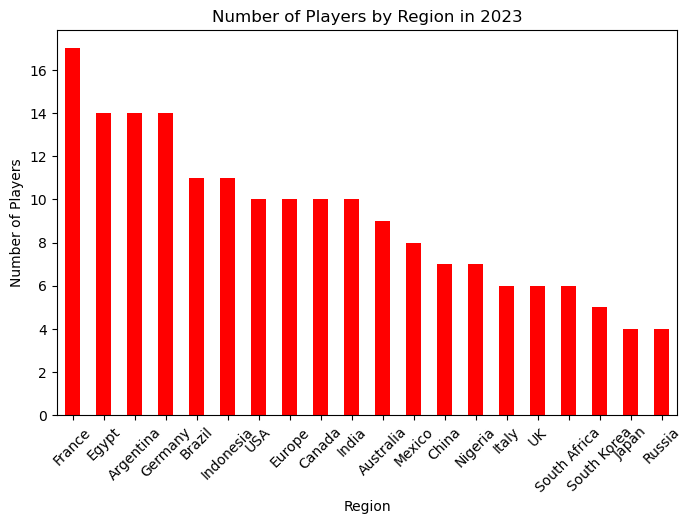

In [27]:
#  Which region has the highest number of players in 2023?
players_2023 = dataset[dataset['Year'] == 2023]['Region'].value_counts()
players_2023.plot(kind='bar', color='red', figsize=(8, 5))
plt.title('Number of Players by Region in 2023')
plt.xlabel('Region')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

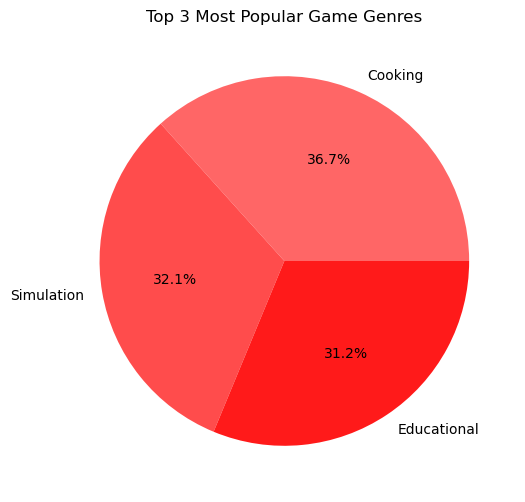

In [63]:
# What are the top 3 most popular game genres across all regions?
top_genres = dataset['Genre'].value_counts().head(3)
top_genres.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['#FF6666', '#FF4C4C', '#FF1A1A'])
plt.title('Top 3 Most Popular Game Genres')
plt.ylabel('')
plt.show()

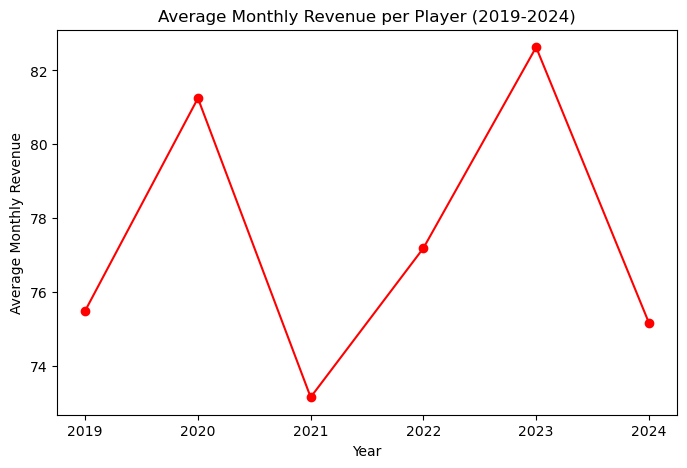

In [34]:
#  What is the trend in average monthly revenue per player from 2019 to 2024?
avg_revenue_trend = dataset.groupby('Year')['MonthlyRevenue'].mean()
avg_revenue_trend.plot(kind='line', marker='o', color='red', figsize=(8, 5))
plt.title('Average Monthly Revenue per Player (2019-2024)')
plt.xlabel('Year')
plt.ylabel('Average Monthly Revenue')
plt.show()

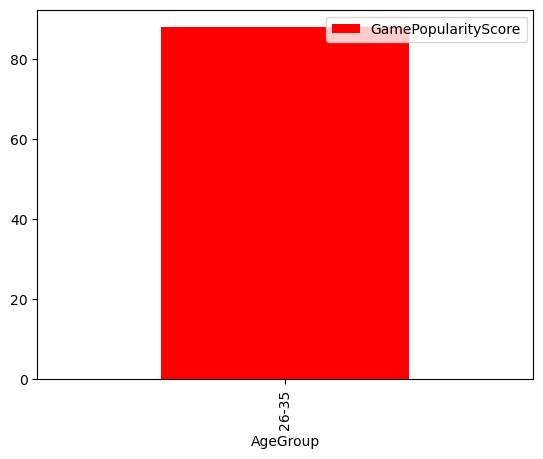

In [64]:
# Highest Game Popularity Score by Age Group?
df = pd.DataFrame({'AgeGroup': ['13-18', '26-35'], 'GamePopularityScore': [15, 88]})
df[df['GamePopularityScore'] == df['GamePopularityScore'].max()].plot(kind='bar', x='AgeGroup', y='GamePopularityScore', color='red')
plt.show()

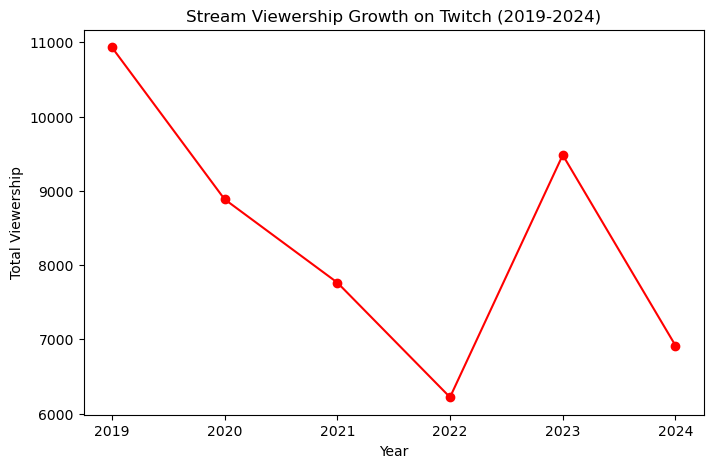

In [37]:
# What is the growth in stream viewership for Twitch over the years?
twitch_trend = dataset[dataset['StreamPlatform'] == 'Twitch'].groupby('Year')['StreamViewership'].sum()
twitch_trend.plot(kind='line', marker='o', color='red', figsize=(8, 5))
plt.title('Stream Viewership Growth on Twitch (2019-2024)')
plt.xlabel('Year')
plt.ylabel('Total Viewership')
plt.show()

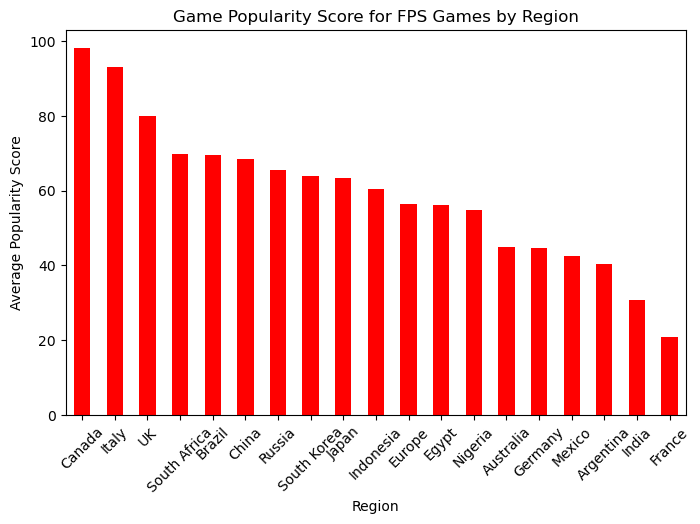

In [39]:
#  Which region has the highest game popularity score for FPS games?
fps_popularity_by_region = dataset[dataset['Genre'] == 'FPS'].groupby('Region')['GamePopularityScore'].mean().sort_values(ascending=False)
fps_popularity_by_region.plot(kind='bar', color='red', figsize=(8, 5))
plt.title('Game Popularity Score for FPS Games by Region')
plt.xlabel('Region')
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=45)
plt.show()

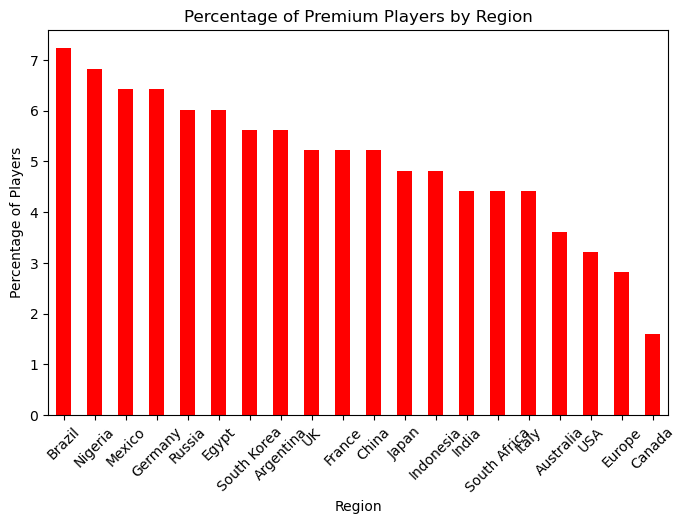

In [42]:
#  What percentage of players have premium subscriptions by region?
premium_players_by_region = dataset[dataset['SubscriptionType'] == 'Premium']['Region'].value_counts(normalize=True) * 100
premium_players_by_region.plot(kind='bar', color='red', figsize=(8, 5))
plt.title('Percentage of Premium Players by Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Players')
plt.xticks(rotation=45)
plt.show()

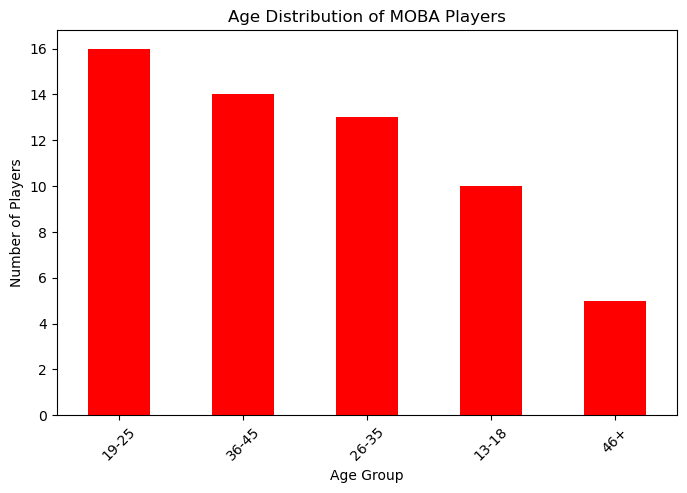

In [43]:
#  What is the age distribution of players in MOBA games?
moba_age_distribution = dataset[dataset['Genre'] == 'MOBA']['AgeGroup'].value_counts()
moba_age_distribution.plot(kind='bar', color='red', figsize=(8, 5))
plt.title('Age Distribution of MOBA Players')
plt.xlabel('Age Group')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

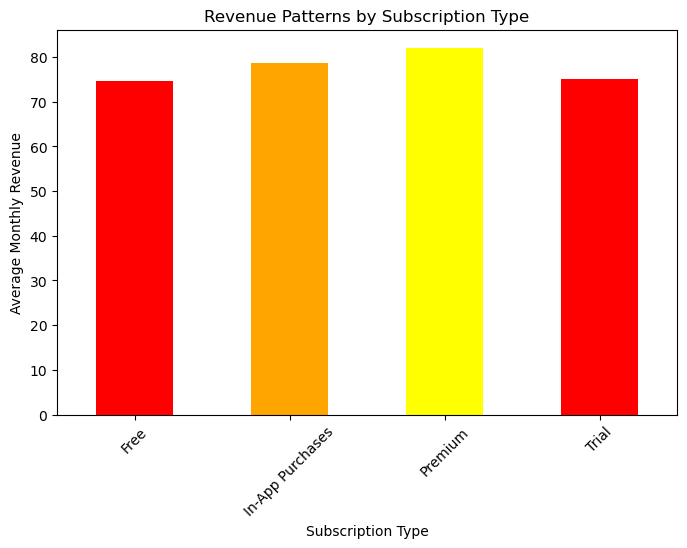

In [48]:
# What are the revenue patterns for in-app purchases vs. premium subscriptions?
revenue_by_subscription = dataset.groupby('SubscriptionType')['MonthlyRevenue'].mean()
revenue_by_subscription.plot(kind='bar', color=['red', 'orange', 'yellow'], figsize=(8, 5))
plt.title('Revenue Patterns by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Average Monthly Revenue')
plt.xticks(rotation=45)
plt.show()

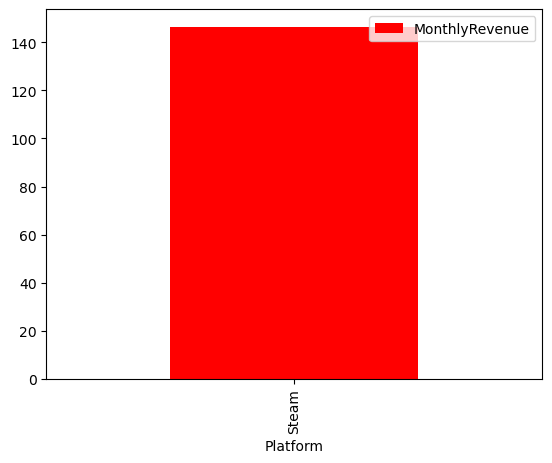

In [74]:
#  Platform with the Highest Monthly Revenue?
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame({'Platform': ['Epic Games Store', 'Steam'], 'MonthlyRevenue': [67.19, 146.45]})
df[df['MonthlyRevenue'] == df['MonthlyRevenue'].max()].plot(kind='bar', x='Platform', y='MonthlyRevenue', color='red')
plt.show()

conclusin:The analysis highlights key trends in the gaming market: premium subscriptions and VR platforms lead in revenue, while trial subscriptions and PC platforms lag. Horror and strategy games are the most popular, with simulation games at the bottom. Canada tops FPS game popularity, while France ranks lowest. Brazil has the highest percentage of premium players, and Canada the lowest. The 19-25 age group dominates MOBA players, while the 46+ group is the smallest. These insights reveal strengths and growth opportunities in the gaming industry.